In [1]:
import numpy as np
import pandas as pd

In [85]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data')
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [86]:
df.shape

(5875, 22)

In [87]:
df = df.drop('subject#', axis=1)

In [88]:
df.dtypes

age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

In [89]:
df.isna().sum() 

age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [90]:
df.describe()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


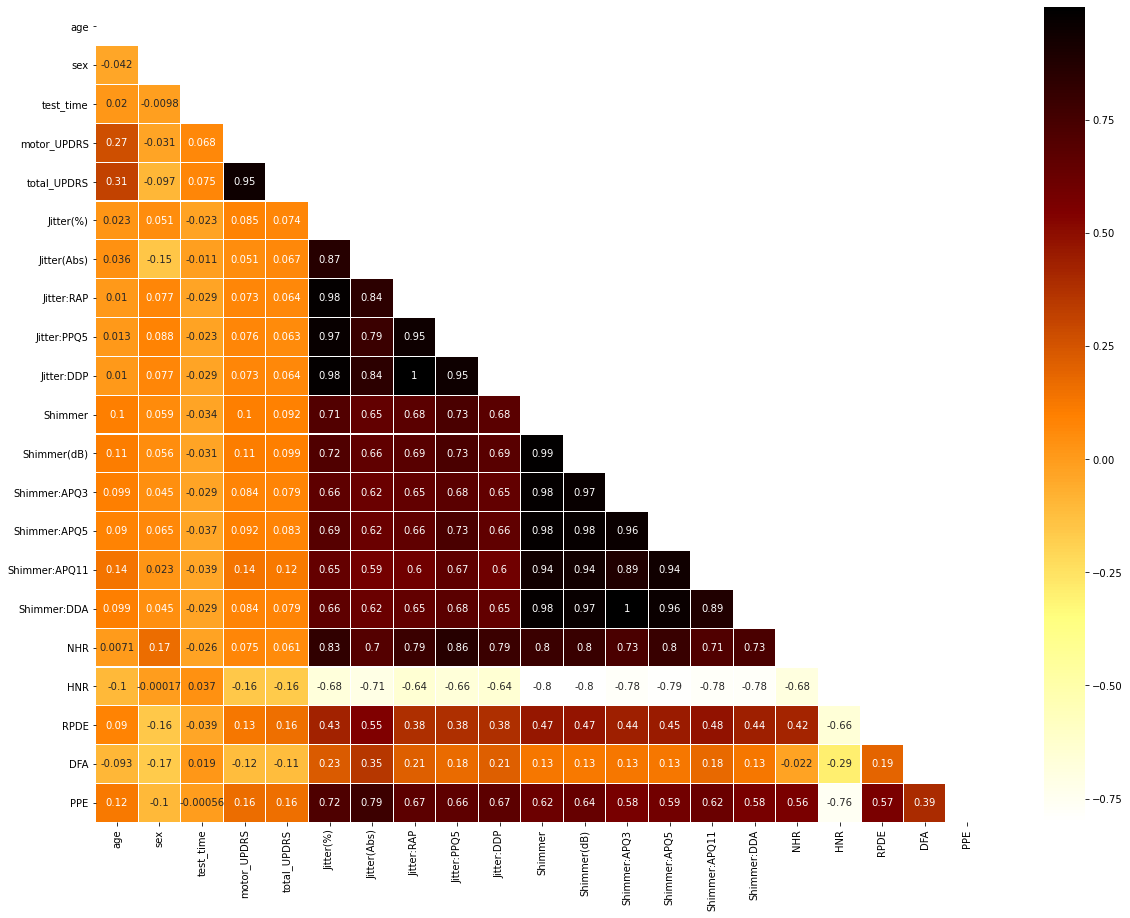

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 15))
mask = np.triu(df.corr())
sns.heatmap(df.corr(),
            annot=True,
            mask=mask,
            ax=ax,
            linecolor='white',
            linewidths=0.1,
            cmap='afmhot_r')
plt.show()

In [92]:
X = df.loc[:, df.columns != 'total_UPDRS']
y = df['total_UPDRS']

In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_std)
np.cumsum(pca.explained_variance_ratio_)

array([0.56417216, 0.65127485, 0.72617589, 0.78955756, 0.83942213,
       0.87924063, 0.91674625, 0.9500172 , 0.96455581, 0.97486904,
       0.98328325, 0.99065846, 0.99560135, 0.99763915, 0.99865029,
       0.99934462, 0.99977757, 0.99999998, 1.        , 1.        ])

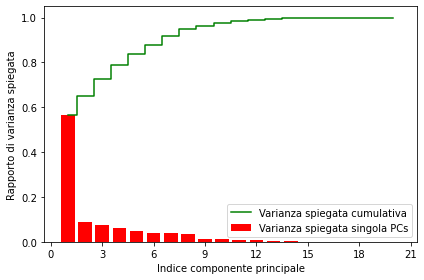

In [94]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.bar(np.array(range(1, X_pca.shape[1]+1)),
        pca.explained_variance_ratio_,
        align='center',
        label='Varianza spiegata singola PCs',
        color='red')
plt.step(np.array(range(1, X_pca.shape[1]+1)),
         cum_var_exp,
         color='green',
         where='mid',
         label='Varianza spiegata cumulativa')
plt.ylabel("Rapporto di varianza spiegata")
plt.xlabel("Indice componente principale")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [95]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_std)

### ANOMALY DETECTION

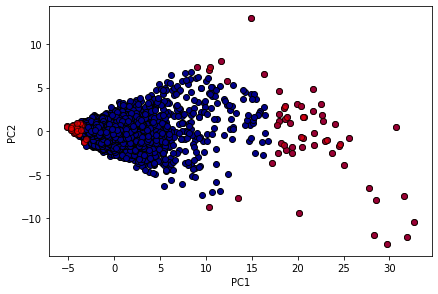

In [103]:
# one-class svm
from sklearn.svm import OneClassSVM
from numpy import where

ocsvm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)
ocsvm.fit(X_pca)

pred_ocsvm = ocsvm.predict(X_pca)

anom_index = where(pred_ocsvm == -1)
outliers = X_pca[pred_ocsvm == -1]
                    
plt.scatter(pd.DataFrame(X_pca).iloc[:,0], pd.DataFrame(X_pca).iloc[:,1], color = 'darkblue', edgecolors='black')
plt.scatter(pd.DataFrame(outliers).iloc[:, 0],
                pd.DataFrame(outliers).iloc[:, 1],
                color='red',
                alpha=.6, edgecolors='black')
plt.tight_layout()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [122]:
lista = []
for i in anom_index[0]:
    lista.append(i)

In [136]:
df = pd.DataFrame(df).drop(lista, axis=0, errors='ignore')
df.shape

(5757, 21)

In [125]:
X = df.loc[:, df.columns != 'total_UPDRS']
y = df['total_UPDRS']

In [126]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_std)

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

### REGRESSIONE LINEARE

In [137]:
from sklearn.linear_model import LinearRegression

lregr = LinearRegression()
lregr.fit(X_train, y_train)
y_pred = lregr.predict(X_test)

In [138]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE su test set %.3f' % mean_squared_error(y_test, y_pred))
print('R2 su test set %.3f' % r2_score(y_test, y_pred))

MSE su test set 32.532
R2 su test set 0.717


### RIDGE, ELASTIC NET & LASSO

In [139]:
# regressione ridge, lasso, elasticNet
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_elastic_net = elastic_net.predict(X_test)

In [140]:
print('MSE su test set RIDGE %.3f' % mean_squared_error(y_test, y_pred_ridge))
print('MSE su test set LASSO %.3f' % mean_squared_error(y_test, y_pred_lasso))
print('MSE su test set ELASTICNET %.3f' % mean_squared_error(y_test, y_pred_elastic_net))
print()
print('R2 su test set RIDGE', r2_score(y_test, y_pred_ridge))
print('R2 su test set LASSO', r2_score(y_test, y_pred_lasso))
print('R2 su test set ELASTICNET', r2_score(y_test, y_pred_elastic_net))

MSE su test set RIDGE 32.533
MSE su test set LASSO 37.576
MSE su test set ELASTICNET 43.804

R2 su test set RIDGE 0.7166945773780456
R2 su test set LASSO 0.6727777756570366
R2 su test set ELASTICNET 0.6185366625693904


### RANSAC

In [141]:
# regressione RANSAC
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)
ransac.fit(X_train, y_train)
y_pred_ransac = ransac.predict(X_test)
print('MSE su test set %.3f' % mean_squared_error(y_test, y_pred_ransac))
print('R2 su test set %.3f' % r2_score(y_test, y_pred_ransac))

MSE su test set 38.159
R2 su test set 0.668


### REGRESSION TREE

In [149]:
# alberi di regressione
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(max_depth=1, random_state=1)
tree.fit(X_train, y_train)
y_pred_DT = tree.predict(X_test)
print('MSE su test set %.3f' % mean_squared_error(y_test, y_pred_DT))
print('R2 su test set %.3f' % r2_score(y_test, y_pred_DT))

MSE su test set 83.076
R2 su test set 0.277


In [143]:
from sklearn.model_selection import GridSearchCV

param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]
param_grid = [{'max_depth': param_range}]

gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  cv=10,
                  n_jobs=-1)

gs.fit(X_train, y_train)
print('Parametri migliori ottenuti dalla GS:', gs.best_params_)

Parametri migliori ottenuti dalla GS: {'max_depth': 9}


In [144]:
mean_errors_on_cv = abs(gs.cv_results_['split0_test_score'] + gs.cv_results_['split1_test_score'] 
+ gs.cv_results_['split2_test_score'] + gs.cv_results_['split3_test_score'] 
+ gs.cv_results_['split4_test_score'] + gs.cv_results_['split5_test_score']
+ gs.cv_results_['split6_test_score'] + gs.cv_results_['split7_test_score']
+ gs.cv_results_['split8_test_score'] + gs.cv_results_['split9_test_score'])/gs.cv

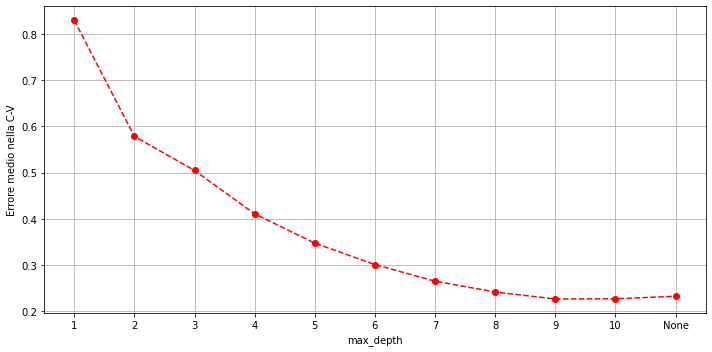

In [145]:
plt.figure(figsize=(10,5))
plt.plot(['1','2','3','4','5','6','7','8','9','10','None'], mean_errors_on_cv/100, 'o--', color='red')
plt.ylabel('Errore medio nella C-V')
plt.xlabel('max_depth')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.grid()
plt.tight_layout()
plt.show()

In [147]:
tree=DecisionTreeRegressor(max_depth=9, random_state=1)
tree.fit(X_train, y_train)
y_pred_DT = tree.predict(X_test)
print('MSE su test set dopo la GS %.3f' % mean_squared_error(y_test, y_pred_DT))
print('R2 su test set dopo la GS %.3f' % r2_score(y_test, y_pred_DT))

MSE su test set dopo la GS 22.938
R2 su test set dopo la GS 0.800


### RANDOM FOREST (molto lento su grid search)

In [150]:
# random forest
from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(random_state=1, n_jobs=-1)
tree.fit(X_train, y_train)
y_pred_DT = tree.predict(X_test)
print('MSE su test set %.3f' % mean_squared_error(y_test, y_pred_DT))
print('R2 su test set %.3f' % r2_score(y_test, y_pred_DT))

MSE su test set 10.559
R2 su test set 0.908


In [151]:
from sklearn.model_selection import GridSearchCV

param_range = [1, 2, 3, 4, 5, 6, 7, None]
param_grid = [{'max_depth': param_range,
               'n_estimators': [10, 100, 300],
               'criterion': ['mse', 'mae']}]

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  cv=2,
                  n_jobs=-1)

gs.fit(X_train, y_train)
print('Parametri migliori ottenuti dalla GS:', gs.best_params_)

Parametri migliori ottenuti dalla GS: {'criterion': 'mse', 'max_depth': None, 'n_estimators': 300}


In [153]:
# random forest prediction with hyperparameter tuned
from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor(n_estimators=300,
                             max_depth=None,
                             criterion='mse',
                             random_state=1,
                             n_jobs=-1)
tree.fit(X_train, y_train)
y_pred_DT = tree.predict(X_test)
print('MSE su test set %.3f' % mean_squared_error(y_test, y_pred_DT))
print('R2 su test set %.3f' % r2_score(y_test, y_pred_DT))

MSE su test set 10.334
R2 su test set 0.910


### SUPPORT VECTOR REGRESSOR (lento su grid search)

In [154]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print('MSE su test set %.3f' % mean_squared_error(y_test, y_pred_svr))
print('R2 su test set %.3f' % r2_score(y_test, y_pred_svr))

MSE su test set 27.157
R2 su test set 0.764


In [155]:
from sklearn.model_selection import GridSearchCV

param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = [{'C': param_range,
               'gamma': param_range,
               'kernel': ['rbf']},
              {'kernel': ['linear'],
               'C': param_range}]

gs = GridSearchCV(estimator=SVR(),
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  cv=5,
                  n_jobs=-1)

gs.fit(X_train, y_train)
print('Parametri migliori ottenuti dalla GS:', gs.best_params_)

Parametri migliori ottenuti dalla GS: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [156]:
svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print('MSE su test set %.3f' % mean_squared_error(y_test, y_pred_svr))
print('R2 su test set %.3f' % r2_score(y_test, y_pred_svr))

MSE su test set 8.636
R2 su test set 0.925
